# House Price Prediction using Machine Learning in Python

##### House price prediction is a problem in the real estate industry to make informed decisions. By using machine learning algorithms we can predict the price of a house based on various features such as location, size, number of bedrooms and other relevant factors. In this article we will explore how to build a machine learning model in Python to predict house prices to gain valuable insights into the housing market.

##### To tackle this issue we will build a machine learning model trained on the House Price Prediction Dataset.

In [2]:
# Importing Libraries and Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("D:\BODY\DS_Projects\HousePricePrediction.xlsx")

print(dataset.head(5))

<>:6: SyntaxWarning: invalid escape sequence '\B'
<>:6: SyntaxWarning: invalid escape sequence '\B'
C:\Users\MY PC\AppData\Local\Temp\ipykernel_33776\3075281659.py:6: SyntaxWarning: invalid escape sequence '\B'
  dataset = pd.read_excel("D:\BODY\DS_Projects\HousePricePrediction.xlsx")


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [3]:
dataset.shape

(2919, 13)

In [4]:
# Data Preprocessing
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


<Axes: >

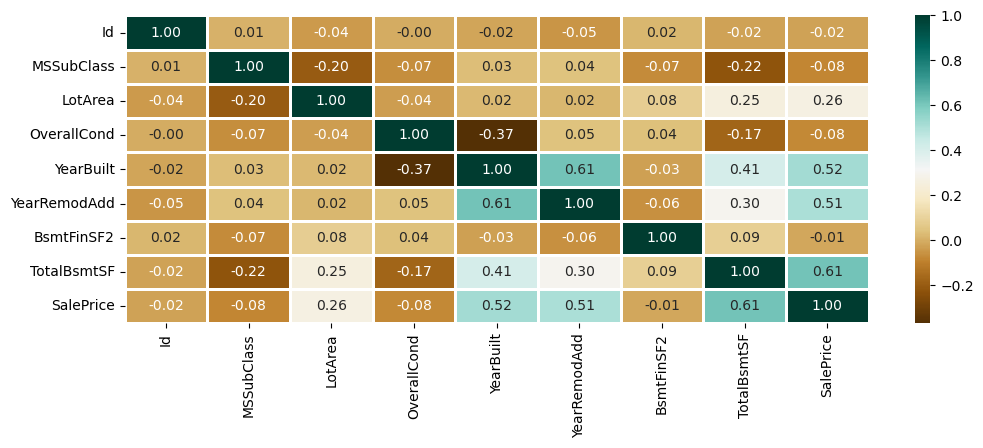

In [10]:
# Exploratory Data Analysis (EDA)
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 4))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

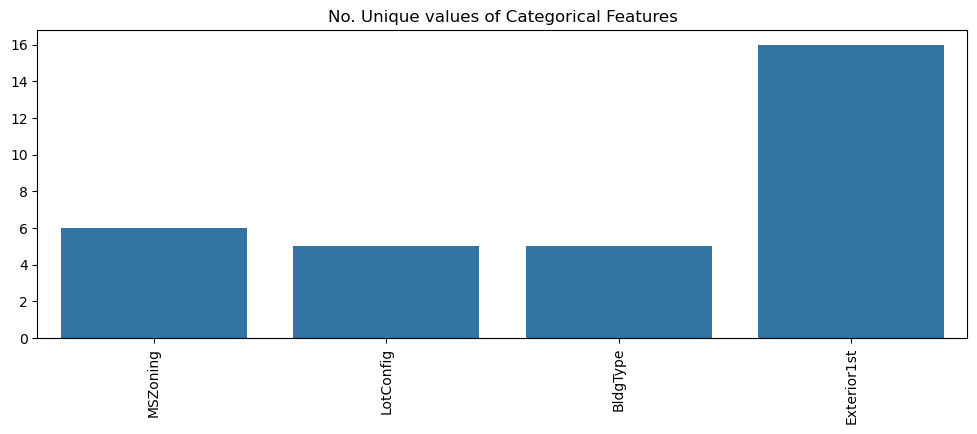

In [13]:
# To analyze the different categorical features. Let’s draw the barplot.
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(12,4))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

##### The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. To findout the actual count of each category we can plot the bargraph of each four features separately.

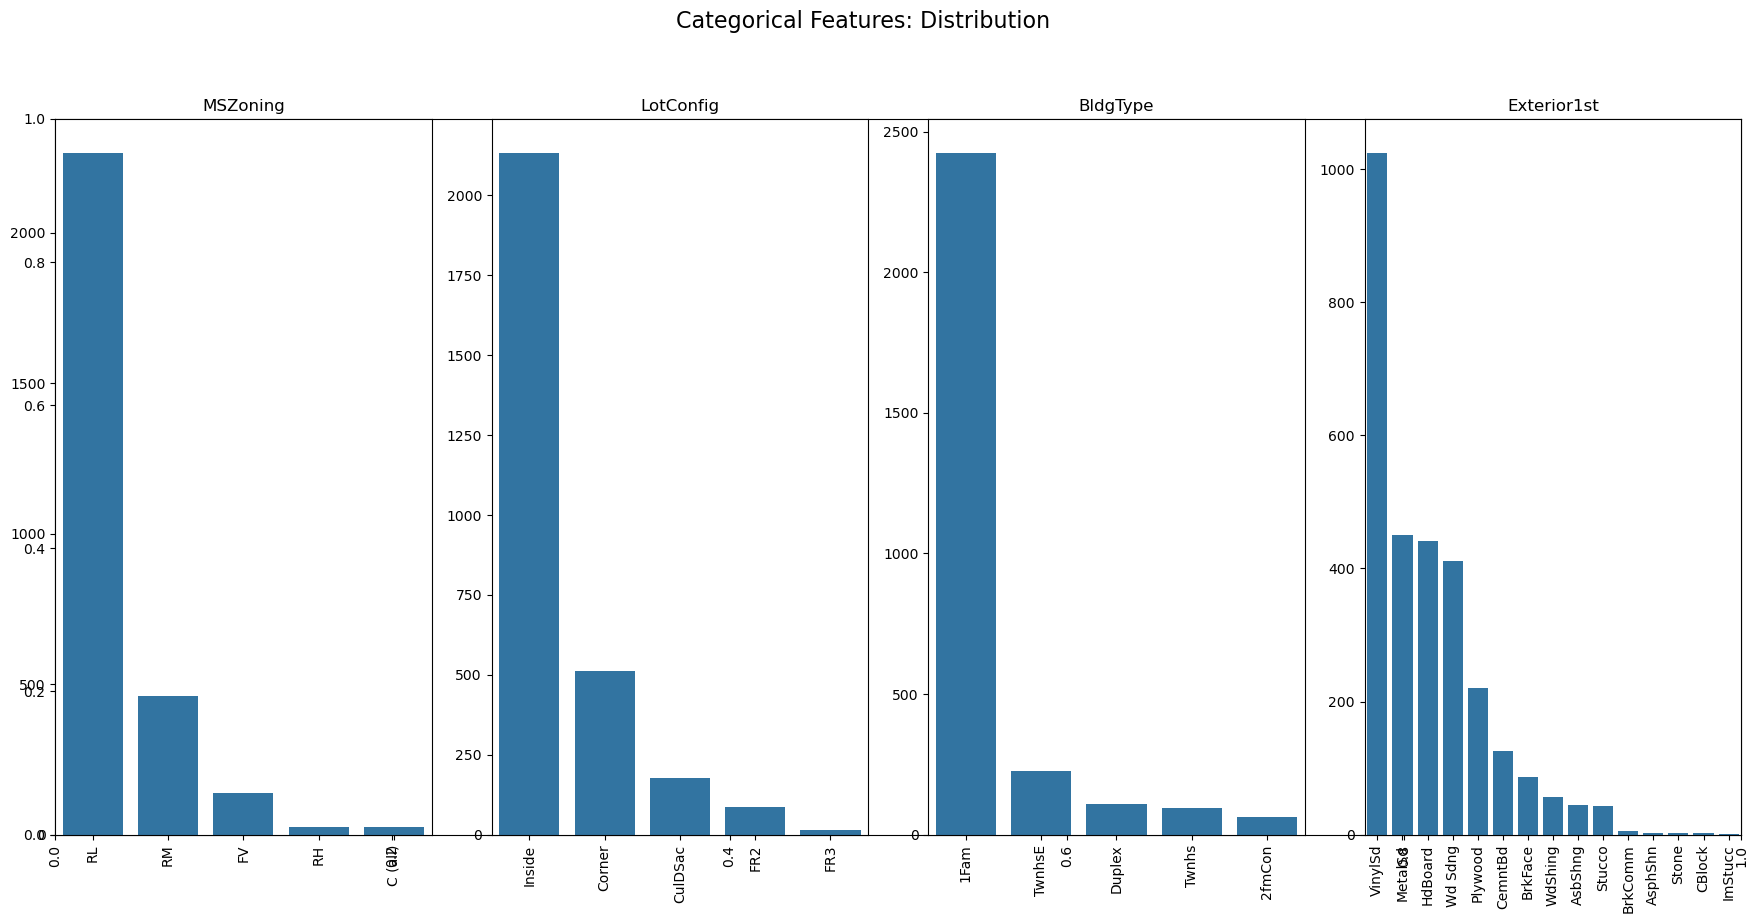

In [25]:
plt.figure(figsize=(18, 10))
plt.suptitle('Categorical Features: Distribution', fontsize=16)
plt.xticks(rotation=90)

index = 1
total = len(object_cols)
cols = 4
rows = (total + cols - 1) // cols  # Automatically calculate rows

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(rows, cols, index)
    sns.barplot(x=list(y.index), y=y.values)
    plt.title(col)
    plt.xticks(rotation=90)
    index += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust for suptitle
plt.show()


In [16]:
# Data Cleaning
# As Id Column will not be participating in any prediction. So we can Drop it.
dataset.drop(['Id'],
             axis=1,
             inplace=True)

# Replacing SalePrice empty values with their mean values to make the data distribution symmetric.
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean())

# Drop records with null values (as the empty records are very less).
new_dataset = dataset.dropna()

# Checking features which have null values in the new dataframe (if there are still any).
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [17]:
# OneHotEncoder – For Label categorical features
'''' 
One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int. So for that firstly we have to collect all the features which have the object datatype.
'''
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))



Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [18]:
# apply OneHotEncoding to the whole list.
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [19]:
# Splitting Dataset into Training and Testing
# X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)



##### Model Training and Accuracy
##### As we have to train the model to determine the continuous values, so we will be using these regression models.

##### SVM-Support Vector Machine
##### Random Forest Regressor
##### Linear Regressor

In [20]:
# SVM – Support vector Machine
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423


In [21]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.18307536114140482

In [22]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18741683841599951


##### Clearly SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.18 approx. 